## Aplicacion Regresion

Para ello vamos a usar el dataset web_traffic.tsv (tab separate values).
La data nos muestra la cantidad de hits a una web por cada hora

In [26]:
import scipy as sp
# Especificaremos a los tabs como delimitadores para
# separar cada columna
data = sp.genfromtxt("web_traffic.tsv", delimiter="\t")
print(data[:10])
print(data.shape)
# Tenemos 743 puntos de data con 2 dimensiones

[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]
 [  4.00000000e+00   1.36500000e+03]
 [  5.00000000e+00   1.48800000e+03]
 [  6.00000000e+00   1.33700000e+03]
 [  7.00000000e+00   1.88300000e+03]
 [  8.00000000e+00   2.28300000e+03]
 [  9.00000000e+00   1.33500000e+03]
 [  1.00000000e+01   1.02500000e+03]]
(743, 2)


#### Preprocesamiento y Limpieza de data

In [27]:
# El vector X va a contener las horas.
# El vector y va a contener la cantidad de hits en una
# hora en particular.

X = data[:, 0] 
y = data[:, 1]

In [28]:
# Tenemos 8 np.nan

sp.sum(sp.isnan(y))

8

In [29]:
# Vamos a remover los puntos donde y es np.nan

X = X[~sp.isnan(y)]
y = y[~sp.isnan(y)]

Para tener una primera impresion de nuestro datos, vamos a plotearlo.

Para ellos vamos a usar Matplotlib.Matplotlib que contiene el paquete pyplot, el cual intenta imitar la interfaz de MATLAB.

Es conveniente y facil de usar.

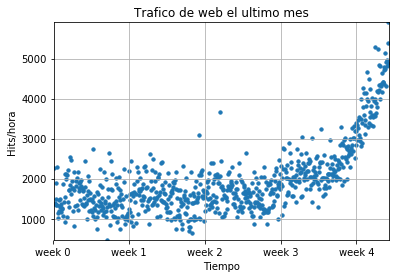

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y, s=11)
plt.title("Trafico de web el ultimo mes")
plt.xlabel("Tiempo")
plt.ylabel("Hits/hora")
plt.xticks([w*7*24 for w in range(10)],
           ['week %i' %w for w in range(10)])
plt.autoscale(tight = True)
plt.grid()
plt.show()

¿Cuánto tiempo manejará nuestro servidor el tráfico web entrante?
- Encontrar el modelo real detras de los puntos de la data
- Usar el modelo para extrapolar 

Antes de contruir el modelo, primero debemos fijarnos en el error.

In [31]:
def error(f, x, y):
    return sp.sum((f(x) - y)**2) 

# Se nota la belleza del vectorizado
# f(x) debe retornar un vector y, debe ser del mismo size
# y tipo que 'y'

In [32]:
# La funcion sp.polyfit() nos crea la funcion del modelo 
# desde los parametros del modelo (X, y).

# residuals = error

fp1, residuals, rank, sv, rcond = sp.polyfit(X, y, 1, full = True)
print("Model parameters: %s" %fp1)
print(residuals)

Model parameters: [   2.59619213  989.02487106]
[  3.17389767e+08]


Esto nos indica que el ajuste de recta es:
    
    f(x) = 2.59619213 * x + 989.02487106

In [33]:
# Para el modelo presentado, tenemos un error relativamente grande

f1 = sp.poly1d(fp1)
print(error(f1, X, y))

317389767.34


Usaremos el modelo f1 para plotear nuestro primer modelo.

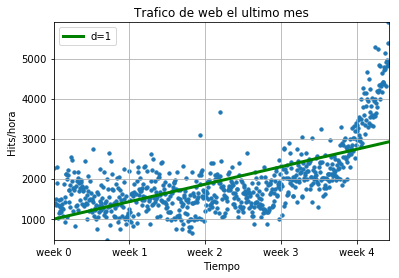

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y, s=11)

######
fx = sp.linspace(0, X[-1], 1000) # genera X-valores para el ploteo
plt.plot(fx, f1(fx), linewidth = 3, color = 'green' )
plt.legend(["d=%i" %f1.order], loc="upper left")
######

plt.title("Trafico de web el ultimo mes")
plt.xlabel("Tiempo")
plt.ylabel("Hits/hora")
plt.xticks([w*7*24 for w in range(10)],
           ['week %i' %w for w in range(10)])
plt.autoscale(tight = True)
plt.grid()
plt.show()

Ahora veremos que tan malo es el error: 317389767.34

En un competencia el error absoluto ayuda al jurado para decidir cual modelo es mejor que el otro.

Por lo visto hasta ahora, podemos decir que este primer ajuste de recta no es el mas adecuado.

In [35]:
# Polinomio de grado 2
f2p = sp.polyfit(X, y, 2) 
print(f2p)

[  1.05322215e-02  -5.26545650e+00   1.97476082e+03]


Esto nos indica que el ajuste de curva es:
    
    f(x) = 0.0105322215 * x^2 - 5.26545650 * x + 1974.76082

In [36]:
f2 = sp.poly1d(f2p)
print(error(f2, X, y))

179983507.878


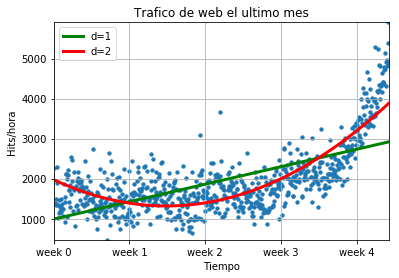

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y, s=11)


###### Recta d = 1
fx = sp.linspace(0, X[-1], 1000) # genera X-valores para el ploteo
plt.plot(fx, f1(fx), linewidth = 3, color = 'green' )
#plt.legend(["d=%i" %f1.order], loc="upper left")
######

###### Recta d = 2
#fx = sp.linspace(0, X[-1], 1000) # genera X-valores para el ploteo
plt.plot(fx, f2(fx), linewidth = 3, color = 'red' )
plt.legend(["d=%i" %f1.order, "d=%i" %f2.order,], loc="upper left")
######


plt.title("Trafico de web el ultimo mes")
plt.xlabel("Tiempo")
plt.ylabel("Hits/hora")
plt.xticks([w*7*24 for w in range(10)],
           ['week %i' %w for w in range(10)])
plt.autoscale(tight = True)
plt.grid()
plt.show()

Vemos que el error en el modelo 2 fue casi la mitad al del modelo 1. 

Ahora tenemos una función más compleja, lo que significa que tenemos un parámetro más para afinar dentro de polyfit()

#### Presentar la curva y error para d = 1, 2, 3, 10 y 100

Sin embargo, fijandonos bien en los ajustes curvas, nos preguntamos si esta curvas capturan el verdadero proceso que genero estos datos. En otras palabras, ¿Nuestros modelos representan correctamente el comportamiento de los clientes que visitan nuestro sitio web?

Observemos el polinomio de grade 10 o grado 100, vemos un comportamiento salvajemente oscilante.

Parece que los modelos se ajustan demasiado a los datos. Tanto que ahora no solo esta capturando el valor esperado sino tambien el ruido. Esto se conoce como **overfitting**

En este momento tenemos las siguientes opciones:
- Seleccionar uno de los modelos polinomiales entrenados.
- Escoger otra clase de modelo mas complejo; ranuras?
- Pensar diferente sobre la data y empezar de nuevo.

Tenemos claro que el primer model es muy simple, y los modelos de orden 10 y 100 tienen mucha varianza o se encuentran **overfitting**. Solo el segundo o tercer modelo parece que realiza un buen match sobre la data. Sin embargo, si extrapolamos en los bordes vemos que va a enloquecer.

Si cambiamos a un modelo mas complejo tambien parece que va a ir mal. Que otros argumentos respaldaria este modelo?. A este punto, puede que hemos entendido bien la data. 

#### Otra mirada a la data

Vemos que si analizamos el grafico, parece que hay un punto de inflexion entre la semana 3 y 4. Entonces podemos separar la data y entrenar dos rectas usando la semana 3.5 como punto de separacion. 

Vamos a entrenar la primera recta con la data hasta la semana 3, y la segunda con la data restante.

In [38]:
inflexion = 3.5*7*24 # Punto de inflexion en horas
inflexion = int(inflexion)
xa = X[:inflexion] # Data antes del punto de inflexion
ya = y[:inflexion]
xb = X[inflexion:] # Data restante
yb = y[inflexion:] 

fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))

fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print("Error inflection=%lf" %(fa_error + fb_error))

Error inflection=132950348.197616


Vamos a plotear las dos rectas

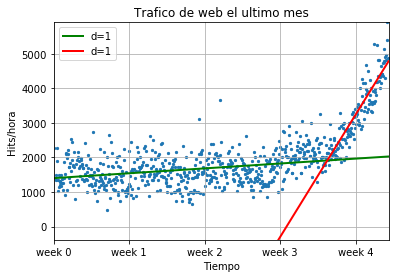

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y, s=5)

fx = sp.linspace(0, 745) # Valores para la primera recta
fx_= sp.linspace(500, 745)

plt.plot(fx, fa(fx), linewidth = 2, color = 'green')
plt.plot(fx_, fb(fx_), linewidth = 2, color = 'red' )

plt.legend(["d=%i" %fa.order, "d=%i" %fb.order,], loc="upper left")

plt.title("Trafico de web el ultimo mes")
plt.xlabel("Tiempo")
plt.ylabel("Hits/hora")
plt.xticks([w*7*24 for w in range(10)],
           ['week %i' %w for w in range(10)])
plt.autoscale(tight = True)
plt.grid()
plt.show()

Claramente, la combinacion de estas dos rectas parece estar mejor ajustada a la data que cualquier modelo que hayamos hecho antes. Pero aun, los errores combinador es mayor que el del polinomio con mayor orden. Podemos confiar en este error ultimo?

Preguntando de otra manera, porque confiamos en el ajuste de recta hecho en la ultima semana de nuestra que en cualquier otro modelo mas complejo? Esto es porque asumimon que esto va a capturar mejor la data futura. Si ploteamos el modelo en el futuro, vemos lo bien que estamos.

/home/leonardo/anaconda3/lib/python3.5/site-packages/numpy/lib/polynomial.py:583: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/leonardo/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: RankWarning: Polyfit may be poorly conditioned


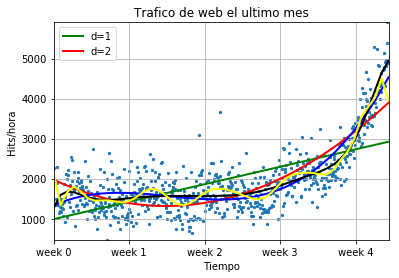

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y, s=5)

fx = sp.linspace(0, 745) # Valores para la primera recta

f1 = sp.poly1d(sp.polyfit(X, y, 1))
f2 = sp.poly1d(sp.polyfit(X, y, 2))
f3 = sp.poly1d(sp.polyfit(X, y, 3))
f10 = sp.poly1d(sp.polyfit(X, y, 10))
f100 = sp.poly1d(sp.polyfit(X, y, 100))

plt.plot(fx, f1(fx), linewidth = 2, color = 'green')
plt.plot(fx, f2(fx), linewidth = 2, color = 'red' )
plt.plot(fx, f3(fx), linewidth = 2, color = 'blue' )
plt.plot(fx, f10(fx), linewidth = 2, color = 'black' )
plt.plot(fx, f100(fx), linewidth = 2, color = 'yellow' )

plt.legend(["d=%i" %f1.order, "d=%i" %f2.order],
            #"d=%i" %f3.order], 
           loc="upper left")

plt.title("Trafico de web el ultimo mes")
plt.xlabel("Tiempo")
plt.ylabel("Hits/hora")
plt.xticks([w*7*24 for w in range(10)],
           ['week %i' %w for w in range(10)])
plt.autoscale(tight = True)
plt.grid()
plt.show()

Vemos que para los modelos de grado 10 y 100 no parece que tengan un futuro muy bueno. 

Se esforzaron tanto en modelar correctamente los datos dados,que resultaron claramente inútiles para extrapolarlos. Esto se conoce como **overfitting**. Por otro lado, el modelo de bajo grado no paracen haber sido capaz de capturar la data apropiadamente. Esto es llamado **underfitting**.

/home/leonardo/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: RankWarning: Polyfit may be poorly conditioned
/home/leonardo/anaconda3/lib/python3.5/site-packages/numpy/lib/polynomial.py:583: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/leonardo/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: RankWarning: Polyfit may be poorly conditioned


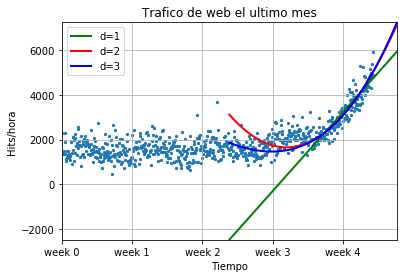

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y, s=5)

fx = sp.linspace(400, 800) # Valores para la primera recta

f1 = sp.poly1d(sp.polyfit(X[inflexion:], y[inflexion:], 1))
f2 = sp.poly1d(sp.polyfit(X[inflexion:], y[inflexion:], 2))
f3 = sp.poly1d(sp.polyfit(X[inflexion:], y[inflexion:], 3))
f10 = sp.poly1d(sp.polyfit(X[inflexion:], y[inflexion:], 10))
f100 = sp.poly1d(sp.polyfit(X[inflexion:], y[inflexion:], 100))

plt.plot(fx, f1(fx), linewidth = 2, color = 'green')
plt.plot(fx, f2(fx), linewidth = 2, color = 'red' )
plt.plot(fx, f3(fx), linewidth = 2, color = 'blue' )
#plt.plot(fx, f10(fx), linewidth = 2, color = 'black' )
#plt.plot(fx, f100(fx), linewidth = 2, color = 'yellow' )

plt.legend(["d=%i" %f1.order, "d=%i" %f2.order,
            "d=%i" %f3.order], 
           loc="upper left")

plt.title("Trafico de web el ultimo mes")
plt.xlabel("Tiempo")
plt.ylabel("Hits/hora")
plt.xticks([w*7*24 for w in range(10)],
           ['week %i' %w for w in range(10)])
plt.autoscale(tight = True)
plt.grid()
plt.show()

In [42]:
f1_error = error(f1, xb, yb)
f2_error = error(f2, xb, yb)
f3_error = error(f3, xb, yb)
f10_error = error(f10, xb, yb)
f100_error = error(f100, xb, yb)

print("Error d=1:\t%lf" %(f1_error))
print("Error d=2:\t%lf" %(f2_error))
print("Error d=3:\t%lf" %(f3_error))
print("Error d=10:\t%lf" %(f10_error))
print("Error d=100:\t%lf" %(f100_error))

Error d=1:	22143941.107618
Error d=2:	19768846.989176
Error d=3:	19766452.361027
Error d=10:	18949296.785551
Error d=100:	18300790.176057


Vemos que el error sigue siendo menor para un modelo o ajuste de recta de mayor grado para una data a partir de la semana 3.5, deberiamos escoger el polinomio mas complejo.

### Training and testing

Si solo tuvieramos data futura que podriamos usar para corroborar el modelo. Debemos estar aptos para juzgar nuestro modelo elegido solo con el error que tenemos.

Apesar que no podemos ver en el futuro, podemos y debemos simular un efecto simular manteniendo una parte de la data. Vamos a remover, por un instante, cierto porcentaje de la data inicial y entrenar con la resultante. Entonces vamos a usar la data quitada (data test) para calcular el error. Como el modelo ha sido entrenada si conocer el data test, debemos conseguir un concepto mas realista de como el modelo se va a comportar en el futuro.

In [64]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Cross Validation, train 60%, test 40%
X_train, X_test, y_train, y_test = train_test_split(
      xb, yb, test_size=0.4)

f1_error = error(f1, X_test, y_test)
f2_error = error(f2, X_test, y_test)
f3_error = error(f3, X_test, y_test)
f10_error = error(f10, X_test, y_test)
f100_error = error(f100, X_test, y_test)

print("\nError para toda la ultima semana")
print("Error d=1:\t%lf" %(f1_error))
print("Error d=2:\t%lf" %(f2_error))
print("Error d=3:\t%lf" %(f3_error))
print("Error d=10:\t%lf" %(f10_error))
print("Error d=100:\t%lf" %(f100_error))


Error para toda la ultima semana
Error d=1:	11467220.687463
Error d=2:	9419682.956200
Error d=3:	9435380.648218
Error d=10:	9456211.380226
Error d=100:	9539442.567696


Parece que tenemos un ganador. El modelo con grado 2 tiene el error mas bajo,   el cual es el error cuando usamos la data que el modelo no vio durante el       entrenamiento. Y esto es lo que nos va a permitir confiar en que no nos va a    dar sorpresas en un futuro.
 
 #### En resumen
 
 Hemos aprendido dos cosas importantes:
 - Entendimiento y refinamiento de la data,gracias a esto cambiar el foco de     los algoritmos con respecto a la data.
 - No mezclar la data de entrenamiento con la data testeo.
 
 ### Referencias:
 - http://www.scipy.org/Tentative_NumPy_Tutorial
 - http://matplotlib.org/users/pyplot_tutorial.html
 - http://en.wikipedia.org/wiki/Curve_fitting
 - http://scikit-learn.org/stable/modules/cross_validation.html#obtaining-predictions-by-cross-validation

